### Imputaciónes Simples
- Imputación por la medio o mediana, si hay muchos datos faltantes esto puede cambiar la desviación de los datos por lo cual no es aconsejable 
- Imputación por regresión (el valor se cambia por un valor predicho por un modelo de regresión combinando la informaciónm de las columnas o variables faltantes con columnas donde los datos están completos)
- Imputación Hot-Deck  KNN (key nearest neigborg reemplaza los datos faltantes por datos vecinos) se usa cuando no se puede garantizar correlación entre los datos 

### Imputaciones Multiples

- MICE: Multiple Imputation by Chain Equations (las variables tienen que estar relacionadas linealmente)

Se debe identificar la correlación de los datos

# Exploración de datos

* Tener clara la pregunta que queremos responder;
* Tener una idea general de nuestro dataset;
* Definir los tipos de datos que tenemos;
* Elegir el tipo de estadística descriptiva
* Visualizar los datos;
* Analizar las posibles interacciones entre las variables del dataset; y finalmente
* Extraer algunas conclusiones de todo este análisis.

### Tipos de datos

Los siguientes datos son obtenidos del archivo "clean_df.csv"

- initial_sal_ Initial salary offered 
- final_sal Final salary offered
- mean_salary Mean salary obtained from the first two columns
- period Period of time year, month, week , hour that the payment of the salary is stablished
- period_cond The contions offered acroding to the job
- job The position that the persons is taking
- job_type The type of job full time, part time....
- city City where the person has to work
- state The State of the city
- organization_ Name of the organization
- org_desc Description of the organization
- sector_ Sector that the organization belongs to
- sector_level Level of the position like manager or support
- benefits Benefits offered by the organization

In [442]:
import pandas as pd
import numpy as np

In [443]:
df = pd.read_csv('clean_df.csv',encoding="utf-8")
#Carga de datos a un dataframe en pandas

In [444]:
df = df.set_index('uniq_id')
df.head(5)
# Before doing anything we are going to ser the column 'uniq_id' as an index, this way we are noi going to have integrity issues when makin join o merge

,initial_sal_,final_sal,mean_salary,period,period_cond,job,job_type,city,state,organization_,org_desc,sector_,sector_level,benefits
uniq_id,,,,,,,,,,,,,,
58435fcab804439efdcaa7ecca0fd783,0.0,0.0,0.0,NaN,NaN,engineer,full time,dixon,ca,Altec,Industries,Experienced,(Non-Manager),NaN
64d0272dc8496abfd9523a8df63c184c,0.0,0.0,0.0,NaN,NaN,shift supervisor,full time,camphill,pa,Retail,NaN,Project/Program,Management,NaN
1e2637cb5f7a2c4615a99a26c0566c66,0.0,0.0,0.0,NaN,NaN,construction pm,full time,charlottesville,va,Computer,IT Services,Experienced,(Non-Manager),NaN
a6a2b5e825b8ce1c3b517adb2497c5ed,0.0,0.0,0.0,NaN,NaN,housekeeper,part time,austin,tx 78746,Hotels,Lodging Personal Household Services,Customer,Support/Client Care,NaN
2f8bdf60db4d85627ab8f040e67aa78d,0.0,0.0,0.0,NaN,NaN,aflac insurance sales agent,full time,berryville,va 22611,Insurance,NaN,Customer,Support/Client Care,NaN


Los tipos de datos pueden ser:
- numericos:
    * discretos (Toman solo valores enteros como la edad)
    * continuos (Pueden tomar valor dentro de un intervalo como el salario)
- Categoricos
    * binarios (undican una de dos posibles categorias 1 o 0 paso la materia o no)
    * nominales (etiquetan el dato pero no pueden ser ordenados o medidos como el genero, hombre, mujer o .......)
    * ordinales (Corresponden al orden en que vienen los dato)

In [445]:
df.dtypes
#Tipos de datos
# Variables númericas continuos: initial_sal_ , final_sal   ,mean_salary
# Period, jobtype are nominales can be both sorted or measured
# Variables categoricas El resto de las varibales que puedes encontral en la lista que arroja 'dtypes'

initial_sal_     float64
final_sal        float64
mean_salary      float64
period            object
period_cond       object
job               object
job_type          object
city              object
state             object
organization_     object
org_desc          object
sector_           object
sector_level      object
benefits          object
dtype: object

### Descripción estadistica
 Se utilizan medidas:
 - Tendencia central
    * media (se puede aplicar a datos discretos o continuos pero sensible a valores atipicos o sesgados)
    * mediana (soluciona el problema de la media y sirve también para datos duscretos u ordinales)
    

 - Verificación de variabilidad de los datos (que tanto se elejan los datos de la media o la mediana):
    * Desviación estandar (entre mas bajo el valor los datos estan mas agrupados, sensible a datos sesgados)
    * Rango intercuartiles (diferencia entre el percentil 75 y percentil 25, menos sensible a datos sesgados )


In [446]:
df_data = df[df['mean_salary'] !=0]
df_data.head(5)

# We first chose the data with the mean salary diferent to cero, it means thereara a initial salary and an final salary an data in categorical variables
# we hace 1665 rows and 15 columns

,initial_sal_,final_sal,mean_salary,period,period_cond,job,job_type,city,state,organization_,org_desc,sector_,sector_level,benefits
uniq_id,,,,,,,,,,,,,,
b43c077756d5a326c4854e1399fd2464,900.0,1300.0,1100.0,hour,NaN,primrose private preschool teacher,full time,houston,tx 77098,Education,NaN,Entry,Level,NaN
d8491fcefe14d1398de419984dccf427,8000000.0,9500000.0,8750000.0,year,NaN,superintendent,full time,houston,tx,Construction,Industrial Facilities InfrastructureConstru...,Building,Construction/Skilled Trades,NaN
779bb4c9bf038b7fb775134736d36fd4,7000000.0,10000000.0,8500000.0,year,NaN,sr. process engineer,full time,sr. process engineer,manufacturing,Chicago,IL,Engineering,NaN,NaN
ceb44cca7cd280adcb0c84c20f3c6c21,6800000.0,7200000.0,7000000.0,year,NaN,rf system technician,full time temporary,rf system technician,field service,Oklahoma,City OK,Engineering,NaN,NaN
eea9b50afc4fece9f9d6ff0dbf659784,5800000.0,6500000.0,6150000.0,year,NaN,japanese and english speaking interpreter and ...,full time,charleston,wv,Manufacturing,Other,Experienced,(Non-Manager),NaN


In [447]:
df_data.shape

(1665, 14)

#### Find median
In order ot find the median we have to create clusters of the variables "type_job" an the "period" because is not the same the salary of a full time job, or hourly or weekly or per diem

In [448]:
df_data.isnull().sum()
# As we can see there are 134 nan values for period and 5 for job_type


initial_sal_        0
final_sal           0
mean_salary         0
period            134
period_cond      1370
job                 0
job_type            5
city                0
state              94
organization_       0
org_desc          163
sector_             0
sector_level      303
benefits         1412
dtype: int64

In [449]:
df_data = df_data.dropna(subset=['period', 'job_type'])

In [450]:
df_data.shape

(1526, 14)

In [451]:
df_data.isnull().sum()

initial_sal_        0
final_sal           0
mean_salary         0
period              0
period_cond      1232
job                 0
job_type            0
city                0
state              93
organization_       0
org_desc          151
sector_             0
sector_level      303
benefits         1273
dtype: int64

In [452]:
df_data['period'].unique()
# We identified the periods of tiem that will be clusteres

array(['hour', 'year', 'week', 'mont'], dtype=object)

In [453]:
df_data['job_type'].unique()
# We identified the job_type that will be clusteres

array(['full time', 'full time temporary', 'part time', 'temporary',
       'per diem', 'part time temporary'], dtype=object)

In [454]:
# Lets segregate the numeric data
num_data_cluster = df_data[['initial_sal_','final_sal','period','job_type']]
num_data_cluster.head(5)

# I think it would be easier to concatenate period and job_type to simplify the clusters

,initial_sal_,final_sal,period,job_type
uniq_id,,,,
b43c077756d5a326c4854e1399fd2464,900.0,1300.0,hour,full time
d8491fcefe14d1398de419984dccf427,8000000.0,9500000.0,year,full time
779bb4c9bf038b7fb775134736d36fd4,7000000.0,10000000.0,year,full time
ceb44cca7cd280adcb0c84c20f3c6c21,6800000.0,7200000.0,year,full time temporary
eea9b50afc4fece9f9d6ff0dbf659784,5800000.0,6500000.0,year,full time


In [455]:
num_data_cluster_ =num_data_cluster.copy()

num_data_cluster_.loc[:,'period_job'] = ""

num_data_cluster_

,initial_sal_,final_sal,period,job_type,period_job
uniq_id,,,,,
b43c077756d5a326c4854e1399fd2464,900.0,1300.0,hour,full time,
d8491fcefe14d1398de419984dccf427,8000000.0,9500000.0,year,full time,
779bb4c9bf038b7fb775134736d36fd4,7000000.0,10000000.0,year,full time,
ceb44cca7cd280adcb0c84c20f3c6c21,6800000.0,7200000.0,year,full time temporary,
eea9b50afc4fece9f9d6ff0dbf659784,5800000.0,6500000.0,year,full time,
...,...,...,...,...,...
4e2b0a3e9fe5f8721f6ab4692823d9a9,25000.0,0.0,week,full time,
ac3c743eb7612d90bfe80a3a30d3d8be,5500000.0,6000000.0,year,full time,
8e9f8638556bc1fd671bb99f4f01ac4d,7500000.0,8500000.0,year,full time,


In [456]:

num_data_cluster_['period_job'] =  num_data_cluster_['period']+' '+num_data_cluster_['job_type']
num_data_cluster_ = num_data_cluster_.drop(['period','job_type'], axis=1)
num_data_cluster_['period_job'] = num_data_cluster_['period_job'].replace(' ', '_', regex=True)
num_data_cluster_

,initial_sal_,final_sal,period_job
uniq_id,,,
b43c077756d5a326c4854e1399fd2464,900.0,1300.0,hour_full_time
d8491fcefe14d1398de419984dccf427,8000000.0,9500000.0,year_full_time
779bb4c9bf038b7fb775134736d36fd4,7000000.0,10000000.0,year_full_time
ceb44cca7cd280adcb0c84c20f3c6c21,6800000.0,7200000.0,year_full_time_temporary
eea9b50afc4fece9f9d6ff0dbf659784,5800000.0,6500000.0,year_full_time
...,...,...,...
4e2b0a3e9fe5f8721f6ab4692823d9a9,25000.0,0.0,week_full_time
ac3c743eb7612d90bfe80a3a30d3d8be,5500000.0,6000000.0,year_full_time
8e9f8638556bc1fd671bb99f4f01ac4d,7500000.0,8500000.0,year_full_time


In [457]:
#num_data_cluster_[[	'initial_sal_'	,'final_sal']] = num_data_cluster_[[	'initial_sal_'	,'final_sal']].astype(int)
#num_data_cluster_.dtypes

In [458]:
list_period_job = num_data_cluster_['period_job'].unique()
list_period_job
#No we do have a list of the variables to create the clusters to examine data

array(['hour_full_time', 'year_full_time', 'year_full_time_temporary',
       'hour_part_time', 'hour_full_time_temporary', 'week_full_time',
       'hour_temporary', 'hour_per_diem', 'mont_full_time',
       'hour_part_time_temporary', 'mont_part_time', 'year_part_time'],
      dtype=object)

In [459]:
d={}
for  i  in list_period_job:
    d[i]= num_data_cluster_[num_data_cluster_['period_job'].isin([i])]
   
print(d)

# Lets use a dictionary to separate each cluster that later will be a dataframe with its own period_job
# There are diferent ways to do this like create a dateframe with a conditional of the value of the variable "period_job" but lets have fun this way

{'hour_full_time':                                   initial_sal_  final_sal      period_job
uniq_id                                                                  
b43c077756d5a326c4854e1399fd2464         900.0     1300.0  hour_full_time
3c2f7c555173e04db07a96b23c1be974        1375.0     1675.0  hour_full_time
f884de2958f94e4ad417aefcacd350c7        1700.0     2200.0  hour_full_time
776bd5c4c2412714ed9f1ac098470aac        1500.0     1900.0  hour_full_time
64a597e5dd17740aadf4b0e8047b51a5        1500.0     2100.0  hour_full_time
...                                        ...        ...             ...
5310eafc4a142affdd10ab50de2c1cca        1500.0     1800.0  hour_full_time
b5838e6822ee1ffd9174d41ba9ae7b9b        1400.0     1600.0  hour_full_time
4a65f0199487728cc762abd524237360        1175.0     1275.0  hour_full_time
292810c8b37005b3b49f84c790110594        2325.0     2521.0  hour_full_time
40161cf61c283af9dc2b0a62947a5f1b        2500.0     2800.0  hour_full_time

[439 rows x 3 colu

In [460]:
def create_Dataframes(d, dict_dataframes):
    return d.get(dict_dataframes)
    

hour_full_time              =  create_Dataframes(d,list_period_job[0])
year_full_time              =  create_Dataframes(d,list_period_job[1])
year_full_time_temporary    =  create_Dataframes(d,list_period_job[2])
hour_part_time              =  create_Dataframes(d,list_period_job[3])
hour_full_time_temporary    =  create_Dataframes(d,list_period_job[4])
week_full_time              =  create_Dataframes(d,list_period_job[5])
hour_temporary              =  create_Dataframes(d,list_period_job[6])
hour_per_diem               =  create_Dataframes(d,list_period_job[7])
mont_full_time              =  create_Dataframes(d,list_period_job[8])
hour_part_time_temporary    =  create_Dataframes(d,list_period_job[9])
mont_part_time              =  create_Dataframes(d,list_period_job[10])
year_part_time              =  create_Dataframes(d,list_period_job[11])

# Finaly in this fucntion we extract each "period_job" so we can create some visualizations for each one


In [461]:
import matplotlib.pyplot as plt
import seaborn as sns

### box-plot for the skewed feature

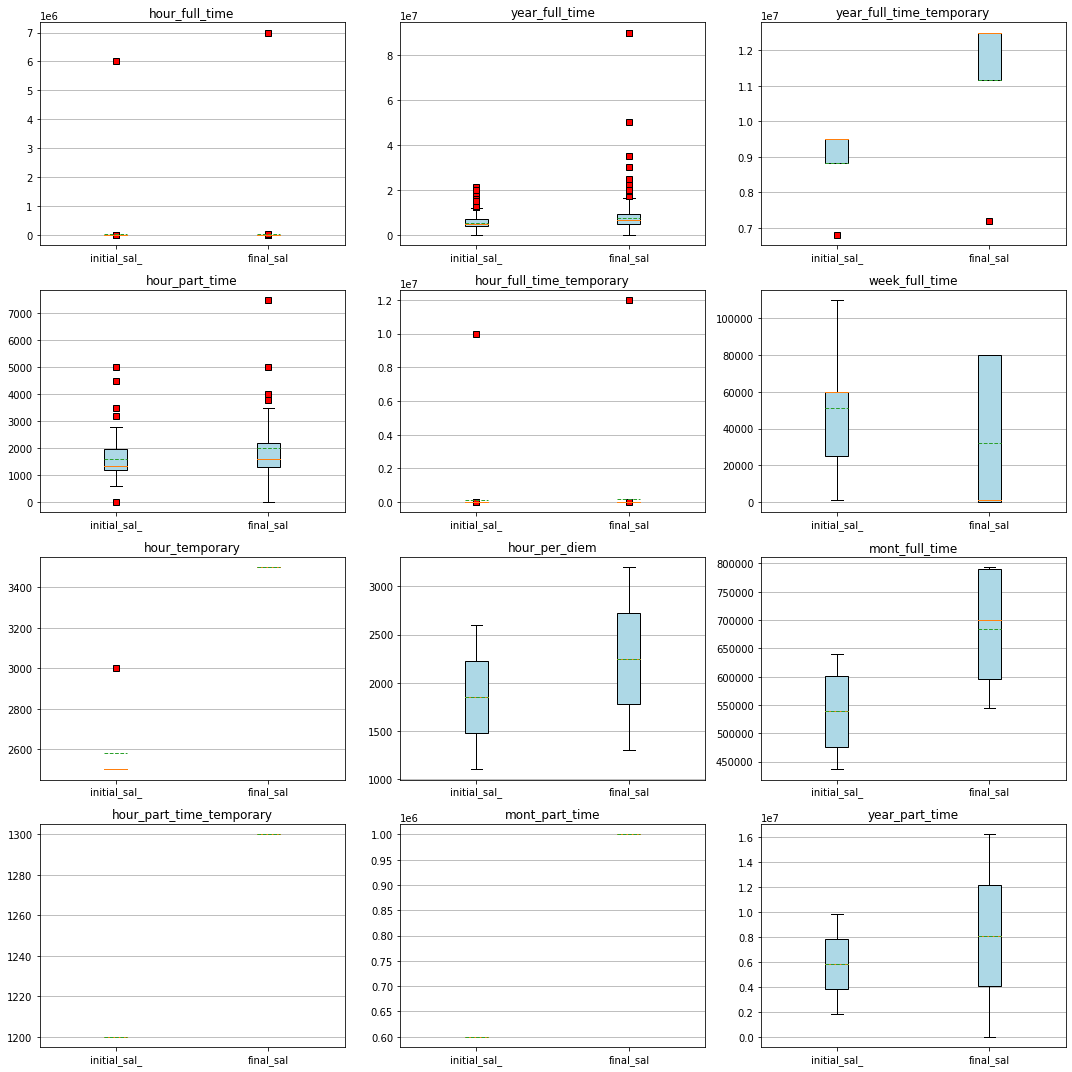

In [462]:
plt.rcParams["figure.figsize"] = [15,15]
plt.rcParams["figure.autolayout"] = True


fig, axs = plt.subplots(4,3)


labels=['initial_sal_','final_sal']
boxprops = dict(facecolor = "lightblue")
flierprops = dict(marker = "s", markerfacecolor = "red")


axs[0, 0].boxplot(hour_full_time[labels], flierprops = flierprops, showmeans = True, meanline = True , patch_artist = True,boxprops = boxprops, labels=labels)
axs[0, 0].set_title('hour_full_time')
axs[0, 0].yaxis.grid(True)

axs[0, 1].boxplot(year_full_time[labels], flierprops = flierprops,showmeans = True, meanline = True ,patch_artist = True, boxprops = boxprops , labels=labels)
axs[0, 1].set_title('year_full_time')
axs[0, 1].yaxis.grid(True)

axs[0, 2].boxplot(year_full_time_temporary[labels], flierprops = flierprops, showmeans = True, meanline = True , patch_artist = True,boxprops = boxprops, labels=labels)
axs[0, 2].set_title('year_full_time_temporary')
axs[0, 2].yaxis.grid(True)

axs[1, 0].boxplot(hour_part_time[labels], flierprops = flierprops,showmeans = True, meanline = True ,patch_artist = True, boxprops = boxprops , labels=labels)
axs[1, 0].set_title('hour_part_time')
axs[1, 0].yaxis.grid(True)

axs[1, 1].boxplot(hour_full_time_temporary[labels], flierprops = flierprops, showmeans = True, meanline = True , patch_artist = True,boxprops = boxprops, labels=labels)
axs[1, 1].set_title('hour_full_time_temporary')
axs[1, 1].yaxis.grid(True)

axs[1, 2].boxplot(week_full_time[labels], flierprops = flierprops,showmeans = True, meanline = True ,patch_artist = True, boxprops = boxprops , labels=labels)
axs[1, 2].set_title('week_full_time')
axs[1, 2].yaxis.grid(True)

axs[2, 0].boxplot(hour_temporary[labels], flierprops = flierprops, showmeans = True, meanline = True , patch_artist = True,boxprops = boxprops, labels=labels)
axs[2, 0].set_title('hour_temporary')
axs[2, 0].yaxis.grid(True)

axs[2, 1].boxplot(hour_per_diem[labels], flierprops = flierprops,showmeans = True, meanline = True ,patch_artist = True, boxprops = boxprops , labels=labels)
axs[2, 1].set_title('hour_per_diem')
axs[2, 1].yaxis.grid(True)

axs[2, 2].boxplot(mont_full_time[labels], flierprops = flierprops, showmeans = True, meanline = True , patch_artist = True,boxprops = boxprops, labels=labels)
axs[2, 2].set_title('mont_full_time')
axs[2, 2].yaxis.grid(True)

axs[3, 0].boxplot(hour_part_time_temporary[labels], flierprops = flierprops,showmeans = True, meanline = True ,patch_artist = True, boxprops = boxprops , labels=labels)
axs[3, 0].set_title('hour_part_time_temporary')
axs[3, 0].yaxis.grid(True)

axs[3, 1].boxplot(mont_part_time[labels], flierprops = flierprops, showmeans = True, meanline = True , patch_artist = True,boxprops = boxprops, labels=labels)
axs[3, 1].set_title('mont_part_time')
axs[3, 1].yaxis.grid(True)

axs[3, 2].boxplot(year_part_time[labels], flierprops = flierprops,showmeans = True, meanline = True ,patch_artist = True, boxprops = boxprops , labels=labels)
axs[3, 2].set_title('year_part_time')
axs[3, 2].yaxis.grid(True)


plt.show()

# What we can see hear is that the outliers are mostly in one of the sides of the boxplot , in seems that in this case above the maximun value of the salariees
# But not for every cluster junt for some of them, those which have no aoutliers will not be processed

#hour_full_time (skew)
#year_full_time (skew)
#year_full_time_temporary (skew) (under minimun)
#hour_part_time (skew)
#hour_full_time_temporary (skew)



## Eliminate outliers
#### As we can see there are some clusters that have outliers too far from the media and this kind of behaviour affects our capacity to create a real measurement or define a tendency, thats why we have to elimitate them

### hour_full_time

### IQR Based Filtering
####Used when our data distribution is skewed.

For Skewed Distributions
Use Inter-Quartile Range (IQR) proximity rule.
The data points that fall below Q1 – 1.5 IQR or above the third quartile Q3 + 1.5 IQR are outliers, where Q1 and Q3 are the 25th and 75th percentile of the dataset, respectively. IQR represents the inter-quartile range and is given by Q3 – Q1.

This clusters are skewed mostly above maximun so lets filter them
- hour_full_time
- year_full_time
- year_full_time_temporary (under minimun)
- hour_part_time
- hour_full_time_temporary

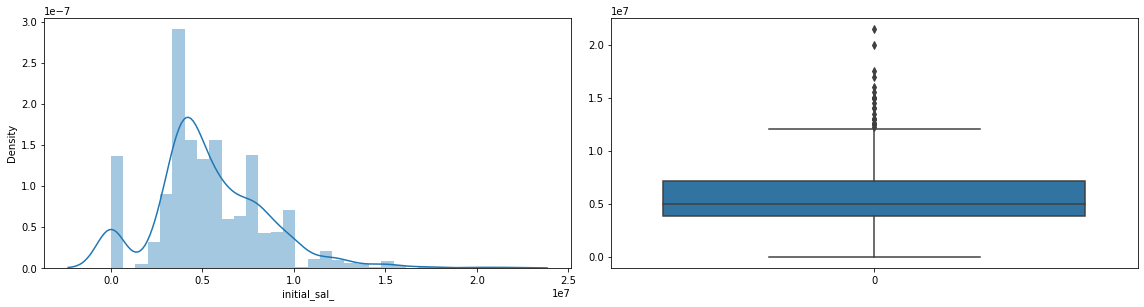

In [480]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(year_full_time['initial_sal_'] )
plt.subplot(2,2,2)
sns.boxplot(year_full_time['initial_sal_'] )
plt.show()

In [465]:
list_skewed = ('hour_full_time' , 'year_full_time','year_full_time_temporary', 'hour_part_time','hour_full_time_temporary')
list_skewed

('hour_full_time',
 'year_full_time',
 'year_full_time_temporary',
 'hour_part_time',
 'hour_full_time_temporary')

In [466]:
print('max:  ',max(new_hour_full_time['initial_sal_']))
print('min:  ',min(new_hour_full_time['initial_sal_']))

max:   3100.0
min:   0.0


In [475]:
# Finding the percentils
def percentil(cluster):
    return cluster.quantile(0.75), cluster.quantile(0.25)
   
hour_full_time_75_25            = percentil(hour_full_time['initial_sal_'])
year_full_time_75_25            = percentil(year_full_time['initial_sal_'])
year_full_time_temporary_75_25  = percentil(year_full_time_temporary['initial_sal_'])
hour_part_time_75_25            = percentil(hour_part_time['initial_sal_'])
hour_full_time_temporary_75_25  = percentil(hour_full_time_temporary['initial_sal_'])


# Finding the IQR
def i_q_r(percentils):
    return percentils[0]-percentils[1]

iqr_hour_full_time           = i_q_r(hour_full_time_75_25)
iqr_year_full_time           = i_q_r(year_full_time_75_25)
iqr_year_full_time_temporary = i_q_r(year_full_time_temporary_75_25)
iqr_hour_part_time           = i_q_r(hour_part_time_75_25)
iqr_hour_full_time_temporary = i_q_r(hour_full_time_temporary_75_25)


# Finding the limits
def limits(percentil, iqr):
    return percentil[0] + 1.5*iqr, percentil[1] - 1.5*iqr

hour_full_time_up_low           = limits(hour_full_time_75_25,iqr_hour_full_time)
year_full_time_up_low           = limits(year_full_time_75_25,iqr_year_full_time)
year_full_time_temporary_up_low = limits(year_full_time_temporary_75_25,iqr_year_full_time_temporary)
hour_part_time_up_low           = limits(hour_part_time_75_25,iqr_hour_part_time)
hour_full_time_temporary_up_low = limits(hour_full_time_temporary_75_25,iqr_hour_full_time_temporary)
print(year_full_time_up_low)


# Trimming outliers
def Trimming_outliers_up(dataset , column ,  up_low):
    return dataset[dataset[column] < up_low[0]]
    
new_full_time_up                    = Trimming_outliers_up(hour_full_time, 'initial_sal_', hour_full_time_up_low)
new_year_full_time_up               = Trimming_outliers_up(year_full_time, 'initial_sal_' , year_full_time_up_low)
new_year_full_time_temporary_up     = Trimming_outliers_up(year_full_time_temporary, 'initial_sal_' ,year_full_time_temporary_up_low)
new_hour_part_time_up               = Trimming_outliers_up(hour_part_time, 'initial_sal_' ,hour_part_time_up_low)  
new_hour_full_time_temporary_up     = Trimming_outliers_up(hour_full_time_temporary, 'initial_sal_', hour_full_time_temporary_up_low)                            


def Trimming_outliers_low(dataset , column ,  up_low):
    return dataset[dataset[column] > up_low[1]]

new_full_time_low                    = Trimming_outliers_low(new_full_time_up, 'initial_sal_', hour_full_time_up_low)
new_year_full_time_low               = Trimming_outliers_low(new_year_full_time_up, 'initial_sal_' , year_full_time_up_low)
new_year_full_time_temporary_low     = Trimming_outliers_low(new_year_full_time_temporary_up, 'initial_sal_' ,year_full_time_temporary_up_low)
new_hour_part_time_low               = Trimming_outliers_low(new_hour_part_time_up, 'initial_sal_' ,hour_part_time_up_low)  
new_hour_full_time_temporary_low     = Trimming_outliers_low(new_hour_full_time_temporary_up, 'initial_sal_', hour_full_time_temporary_up_low) 



(12183375.0, -1230025.0)


### Compare the plots after trimming

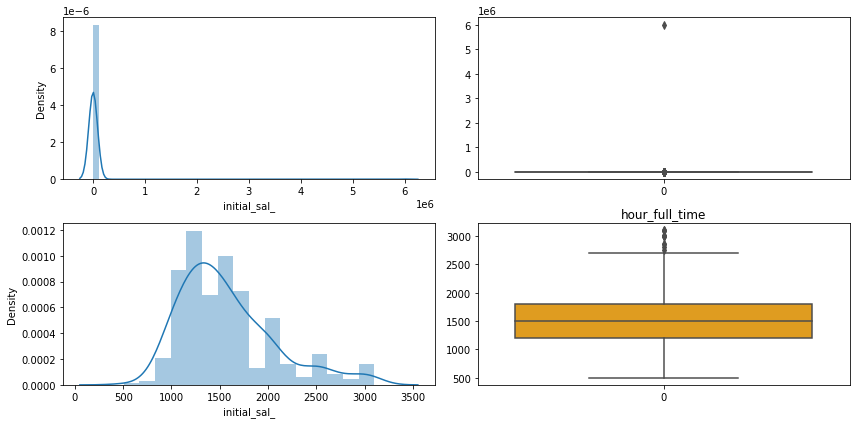

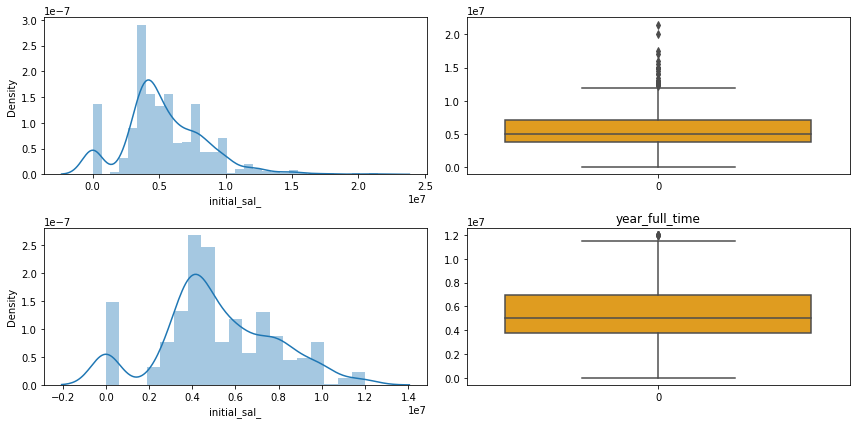

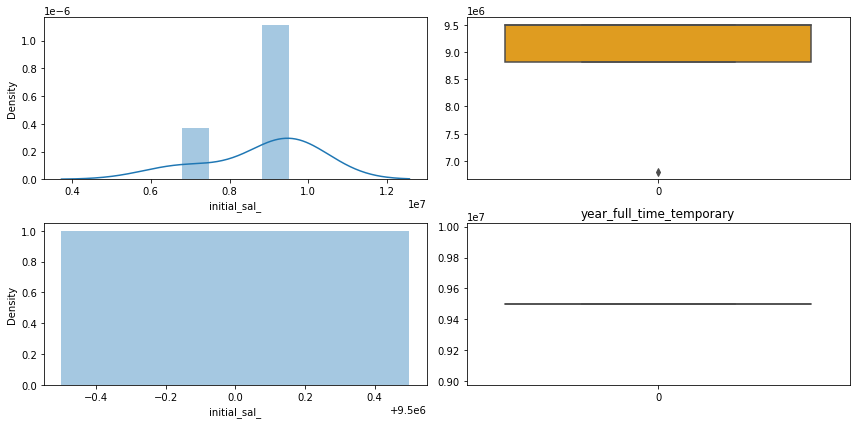

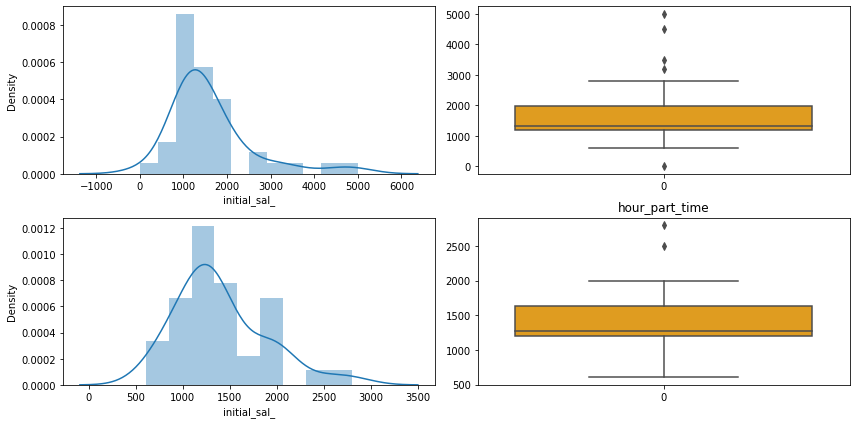

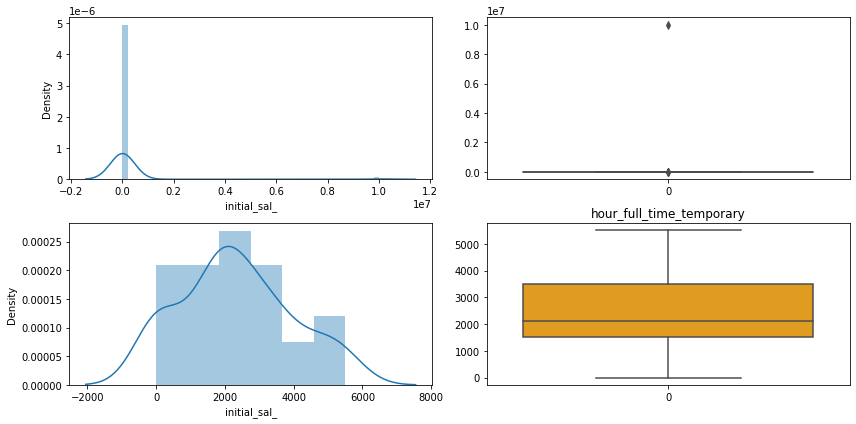

In [493]:

import warnings
warnings.filterwarnings('ignore')



def plotting (dataset_orig, dataset_new):
    plt.figure(figsize=(12,6))   
    plt.subplot(2,2,1)
    sns.distplot(dataset_orig , kde=True )
    plt.subplot(2,2,2)
    sns.boxplot(dataset_orig,color = "orange")
    plt.subplot(2,2,3)
    sns.distplot(dataset_new , kde=True )
    plt.subplot(2,2,4)
    sns.boxplot(dataset_new ,color = "orange" )
  
    
plotting(hour_full_time['initial_sal_'], new_full_time_low['initial_sal_'])
plt.title("hour_full_time")
plt.show()
    

plotting(year_full_time['initial_sal_'], new_year_full_time_low['initial_sal_'])
plt.title("year_full_time")
plt.show()

plotting(year_full_time_temporary['initial_sal_'], new_year_full_time_temporary_low['initial_sal_'])
plt.title("year_full_time_temporary")
plt.show()

plotting(hour_part_time['initial_sal_'], new_hour_part_time_low['initial_sal_'])
plt.title("hour_part_time")
plt.show()

plotting(hour_full_time_temporary['initial_sal_'], new_hour_full_time_temporary_low['initial_sal_'])
plt.title("hour_full_time_temporary")
plt.show()

### The problem

- Need to know about what’s most common, the ranges of distributions, etc.

#### DESCRIPTIVE STATISTICS!

### Visualizar los datos

Para datos continuos y discretos podemos graficar un histograma que se obtiene:
* Organizando los datos en grupos 
* Realizar el conteo de datos en cada grupo
* Verificar si la información es normal (forma de campana) o sesgada (inclinada hacia uno de los lados)
* Realizar diagramas boxplots para verificar los datos sesgados (Tanto para datos continuos como discretos)
    - El extremos de bloxplot son los procentiles 25 y 75 por fuera estan los whisker que son el 25 o 75 + 1.25 el rango intercuartil
    - Mas alla de los extemos del boxplot están los outliers 

Para los datos Categoricos.
- Hacer un conteo de ocurrencias por cada categoria o el porcentaje que representa la categoria de datos


### Analisis Bivariado y Multivariado

Analisis Bivariado (compara de a dos variables para encontrar correlación)
    - analizar pares de variables usando una grafica de dispersion por ejemplo slario y organiación
    - Se pude analizar el indice de correlación donde un valor cercano a 1 = lineal -1=relacion lineal inversa cerca a 0=no correlación entre los datos
    - Puede ser la comparación de una variable categorica con una númerica (grafica boxplot, violin)
    - Se pueden comparar dos variables categoricas 

Analisis Multivariado (compara simultaneamente todos los pares de variables para encontrar correlación)
    - encontrar el indice de correlación en una matriz de correlación 

### Sumarización

extracción de conclusiones mas importantes
    - Frases mas cortas de la correlación o relación de variables 